In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

df = pd.read_csv('Comp1801CourseworkData.csv')

In [2]:
df.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,32,314.06,30.14,0,Degree,Private sector,Male,London,60173.49
1,20,3758.36,149.36,4,GCSE,Private sector,Female,South East,42965.45
2,36,601.72,21.87,0,Masters,Private sector,Male,East of England,54924.41
3,21,44.89,182.80,9,Masters,Private sector,Female,Northern Ireland,26734.99
4,24,614.80,194.34,0,GCSE,Private sector,Male,Scotland,15325.23


In [3]:
scaler = MinMaxScaler()

In [4]:
scaler = MinMaxScaler()

In [5]:
df['Sex'] = df['Sex'].astype('category')
df['Sex'] = df['Sex'].cat.codes

df['Education'] = df['Education'].astype('category')
df['Education'] = df['Education'].cat.codes

df['WorkType'] = df['WorkType'].astype('category')
df['WorkType'] = df['WorkType'].cat.codes

df['Region'] = df['Region'].astype('category')
df['Region'] = df['Region'].cat.codes


In [6]:
df

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,32,314.06,30.14,0,1,0,1,2,60173.49
1,20,3758.36,149.36,4,2,0,0,7,42965.45
2,36,601.72,21.87,0,3,0,1,1,54924.41
3,21,44.89,182.80,9,3,0,0,5,26734.99
4,24,614.80,194.34,0,2,0,1,6,15325.23
...,...,...,...,...,...,...,...,...,...
995,56,177.67,272.87,5,2,1,0,4,22306.84
996,54,155.42,231.17,5,5,0,1,9,27704.97
997,22,2376.10,287.15,11,5,0,1,7,62542.89
998,49,4355.04,27.78,0,1,0,1,5,96745.84


In [7]:
X = df.drop(columns='Salary')

In [8]:
X

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region
0,32,314.06,30.14,0,1,0,1,2
1,20,3758.36,149.36,4,2,0,0,7
2,36,601.72,21.87,0,3,0,1,1
3,21,44.89,182.80,9,3,0,0,5
4,24,614.80,194.34,0,2,0,1,6
...,...,...,...,...,...,...,...,...
995,56,177.67,272.87,5,2,1,0,4
996,54,155.42,231.17,5,5,0,1,9
997,22,2376.10,287.15,11,5,0,1,7
998,49,4355.04,27.78,0,1,0,1,5


In [9]:
df_scaled = scaler.fit_transform(X.to_numpy())

In [10]:
df_scaled

array([[0.20634921, 0.06287757, 0.08462657, ..., 0.        , 1.        ,
        0.18181818],
       [0.01587302, 0.85434499, 0.48771004, ..., 0.        , 0.        ,
        0.63636364],
       [0.26984127, 0.12897911, 0.05666565, ..., 0.        , 1.        ,
        0.09090909],
       ...,
       [0.04761905, 0.53671478, 0.95357879, ..., 0.        , 1.        ,
        0.63636364],
       [0.47619048, 0.99145639, 0.07664739, ..., 0.        , 1.        ,
        0.45454545],
       [0.50793651, 0.        , 0.61963688, ..., 0.        , 1.        ,
        0.36363636]])

In [11]:
y = df['Salary']


In [12]:
y

0      60173.49
1      42965.45
2      54924.41
3      26734.99
4      15325.23
         ...   
995    22306.84
996    27704.97
997    62542.89
998    96745.84
999    48651.47
Name: Salary, Length: 1000, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = (train_test_split(
    df_scaled, y, test_size=0.3, random_state=0))

In [14]:
y_train

105     14301.32
68     120167.02
479     72168.69
399     57117.18
434     62145.90
         ...    
835     59015.55
192     52067.57
629     68501.85
559     61094.32
684     73280.28
Name: Salary, Length: 700, dtype: float64

LinearRegression()
28216.78945981907
[  8615.1790098   29936.82617954 -14047.00390106  56198.62261952
   5037.79155922  -1972.69602863   3600.96033428  -6188.94923408]


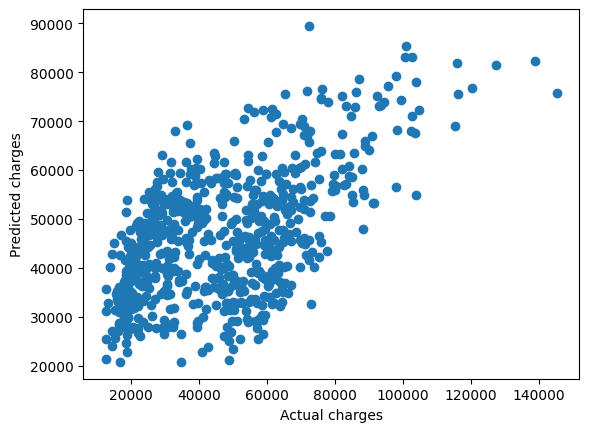

0.3190399394508846


In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr)

c = lr.intercept_
print(c)

m = lr.coef_
print(m)

y_pred_train = lr.predict(X_train)
# print(y_pred_train)

import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.show()

from sklearn.metrics import r2_score

r2_score(y_train, y_pred_train)

print(r2_score(y_train, y_pred_train))